In [140]:
import numpy as np
import pandas as pd
import math
import copy
import random
import matplotlib.pyplot as plt 

In [141]:
filepath="/heart_dis.csv"

In [142]:
def data_extract(filename):
  data=pd.read_csv("/heart_dis.csv")
  X = np.array(data[["Age","trestbps"]])
  Y = np.array(data["label"])

  # labelling
  for i in range(len(Y)):
    if Y[i]==0:
      Y[i]=-1

    # Normalization
  mea = np.mean(X,axis = 0)
  stde = np.std(X,axis = 0)
  X = (X-mea)/stde
  return X,Y


In [143]:
X,Y=data_extract(filepath)
# print(X)
# print(Y)

In [144]:
def Training_Testing_data_extract(X,Y):
  n = X.shape[0]
  m=int(n*0.75)

  X_train=X[:m,:]
  Y_train=Y[:m]

  X_test=X[m:,:]

  Y_test=Y[m:]
  return X_train,Y_train,X_test,Y_test

In [145]:
X_train,Y_train,X_test,Y_test=Training_Testing_data_extract(X,Y)
# print(Y_train)
# print(Y_test)

**SMO**

In [146]:
def gaussian_kernel(x1,x2,sigma=0.5):

	res = np.exp(-np.sum(abs(np.square(x1-x2))/(2*(sigma**2))))
	return res

def predict(X,Y,alpha,b,x,sigma):
  
	result=0.0
	for i in range(X.shape[0]):
		result+=(alpha[i]*Y[i]*gaussian_kernel(X[i,:] , x,sigma));

	result+=b

	return result

def SMO(X,Y,C,tol,max_passes,sigma):
	alpha=np.zeros(shape=(X.shape[0],1));
	b=0.0
	m, n = X.shape
	passes=0

	E=np.zeros(shape=(X.shape[0],1))
	alpha_old=copy.deepcopy(alpha) 

	while(passes < max_passes):
		num_changed_alphas=0
		for i in range(X.shape[0]): 
			E[i]=(predict(X,Y,alpha,b,X[i,:],sigma)-Y[i])
 		
			if ( (-Y[i]*E[i]>tol and -alpha[i]>-C) or (Y[i]*E[i]>tol and alpha[i]>0) ):
     
				j=np.random.choice(list(range(i)) + list(range(i+1, m)), size=1)[0]

	
				E[j] = (predict(X,Y,alpha,b,X[j,:],sigma)-Y[j])

				alpha_old[i]=alpha[i]
				alpha_old[j]=alpha[j]
				
				if (Y[i]!=Y[j]):
					L=max(0,alpha[j]-alpha[i])
					H=min(C,C+alpha[j]-alpha[i])
				else:
					L=max(0,alpha[i]+alpha[j]-C)
					H=min(C,alpha[i]+alpha[j])
		
				if (L==H):
					continue
				eta = 2*gaussian_kernel(X[i,:],X[j,:],sigma)
				eta=eta-gaussian_kernel(X[i,:],X[i,:],sigma)
				eta=eta-gaussian_kernel(X[j,:],X[j,:],sigma)
			
				if (eta >= 0):
					continue		
				
				alpha[j]= alpha_old[j]-((Y[j]*(E[i]-E[j]))/eta)

				if (alpha[j] > H):
					alpha[j]=H
				elif (alpha[j]<L):
					alpha[j]=L
				else:
					pass  
	
				if (abs(alpha[j]-alpha_old[j]) < tol):
					continue
			
				alpha[i] += (Y[i]*Y[j]*(alpha_old[j] - alpha[j])) 


				ii = gaussian_kernel(X[i,:],X[i,:],sigma)
				ij = gaussian_kernel(X[i,:],X[j,:],sigma)
				jj = gaussian_kernel(X[j,:],X[j,:],sigma)			

				b1= b-E[i]- (Y[i]*ii*(alpha[i]-alpha_old[i]))- (Y[j]*ij*(alpha[j]-alpha_old[j]))
				b2= b-E[j]- (Y[i]*ij*(alpha[i]-alpha_old[i]))- (Y[j]*jj*(alpha[j]-alpha_old[j]))
				if (alpha[i] > 0 and alpha[i]<C):
					b=b1
				elif (alpha[j] > 0 and alpha[j] <C):
					b=b2
				else:
					b=(b1+b2)/2.0
			
				num_changed_alphas+=1

		if (num_changed_alphas == 0):
			passes+=1
		else:
			passes=0

	return alpha,b   
		

In [147]:
sigma=2
tot=math.pow(10,-3) #numerical tolerance
iterate=5           #iteration wihtout changing alphas
C=0.05              #regularization parameter

alpha,bias= SMO(X_train,Y_train,C,tot,iterate,sigma)
print(alpha)
print(bias)

[[0.05      ]
 [0.05      ]
 [0.05      ]
 [0.        ]
 [0.        ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.        ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.01632327]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.        ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.00351849]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05      ]
 [0.05

In [148]:
def Error(X_train,Y_train,alpha,bias,X_test,Y_test,sigma):

	Y_predict =np.zeros(shape=(Y_test.shape[0],1)) #predicted by svm 

	for i in range(X_test.shape[0]):
		if (predict(X_train,Y_train,alpha,bias,X_test[i,:],sigma) >= 0 ):
			Y_predict[i]=1.0
		else:
			Y_predict[i]=-1.0
      
	test_error=0.0

	for i in range(Y_predict.shape[0]):
		if (Y_predict[i]!=Y_test[i]):
			test_error+=1.0

	return (1-(test_error/Y_test.shape[0]))*100.0

**ERROR**

In [149]:
err=Error(X_train,Y_train,alpha,bias,X_test,Y_test,sigma)
print("% Error in our Model: ")
print(err)

% Error in our Model: 
48.68421052631579


In [150]:
def plot_decision_boundary(X_train,Y_train,alpha,bias):

	w=np.zeros(shape=(1,X_train.shape[1]))
 
	for i in range(X_train.shape[0]):

		w=np.add(w,np.multiply(alpha[i]*Y_train[i],X_train[i,:]))

		if (Y_train[i]==1.0): 
			plt.plot(X_train[i,0],X_train[i,1],'ro')

		else:
			plt.plot(X_train[i,0],X_train[i,1],'bo')
   
	xx = np.linspace(0,10.0,1000) 
	yy = (-w[0,0] / w[0,1])* xx - (bias) / w[0,1] 
	plt.plot(xx,yy,'k-')
	
	xx = np.linspace(0,10.0,1000)
	yy = (-w[0,0] / w[0,1])* xx - (bias-1) / w[0,1]
	plt.plot(xx,yy,'c-')
	

	xx = np.linspace(0,10.0,1000)
	yy = (-w[0,0] / w[0,1])* xx - (bias+1) / w[0,1] 
	plt.plot(xx,yy,'m-')
	
	plt.xlim(0.0,2)
	plt.ylim(0.0,2)

	plt.xlabel("X1 feature")
	plt.ylabel("X2 feature")

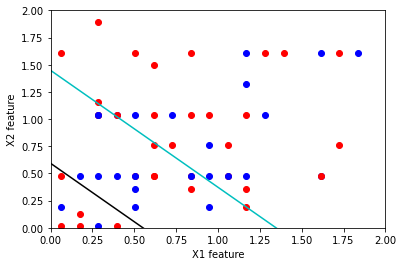

In [151]:
plot_decision_boundary(X_train,Y_train,alpha,bias)